In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    location = 'E:\\Documents\\Dan\\Code\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'


#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

In [2]:
#Project Specific packages:
import zipfile
import DWFT as fp
import os as os
import pywt as py
my_cmap = plt.get_cmap('gray')

In [36]:
def PlotFingerPrint(data, xName, title='', FP='mexh'):
    
    FpScat = fp.getLabeledThumbprint(data, FP)
    FpScat = np.matrix(FpScat)
    
    Al,Ms  = np.meshgrid(xName,np.linspace(1,50,50))

    fig1 = plt.figure(figsize=(6.67,3.75))
    ax1 = plt.axes()
    cs1 = ax1.contourf(Al,Ms, FpScat,cmap=my_cmap,levels=10)

    if Titles: plt.title(title)
    if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()

csv


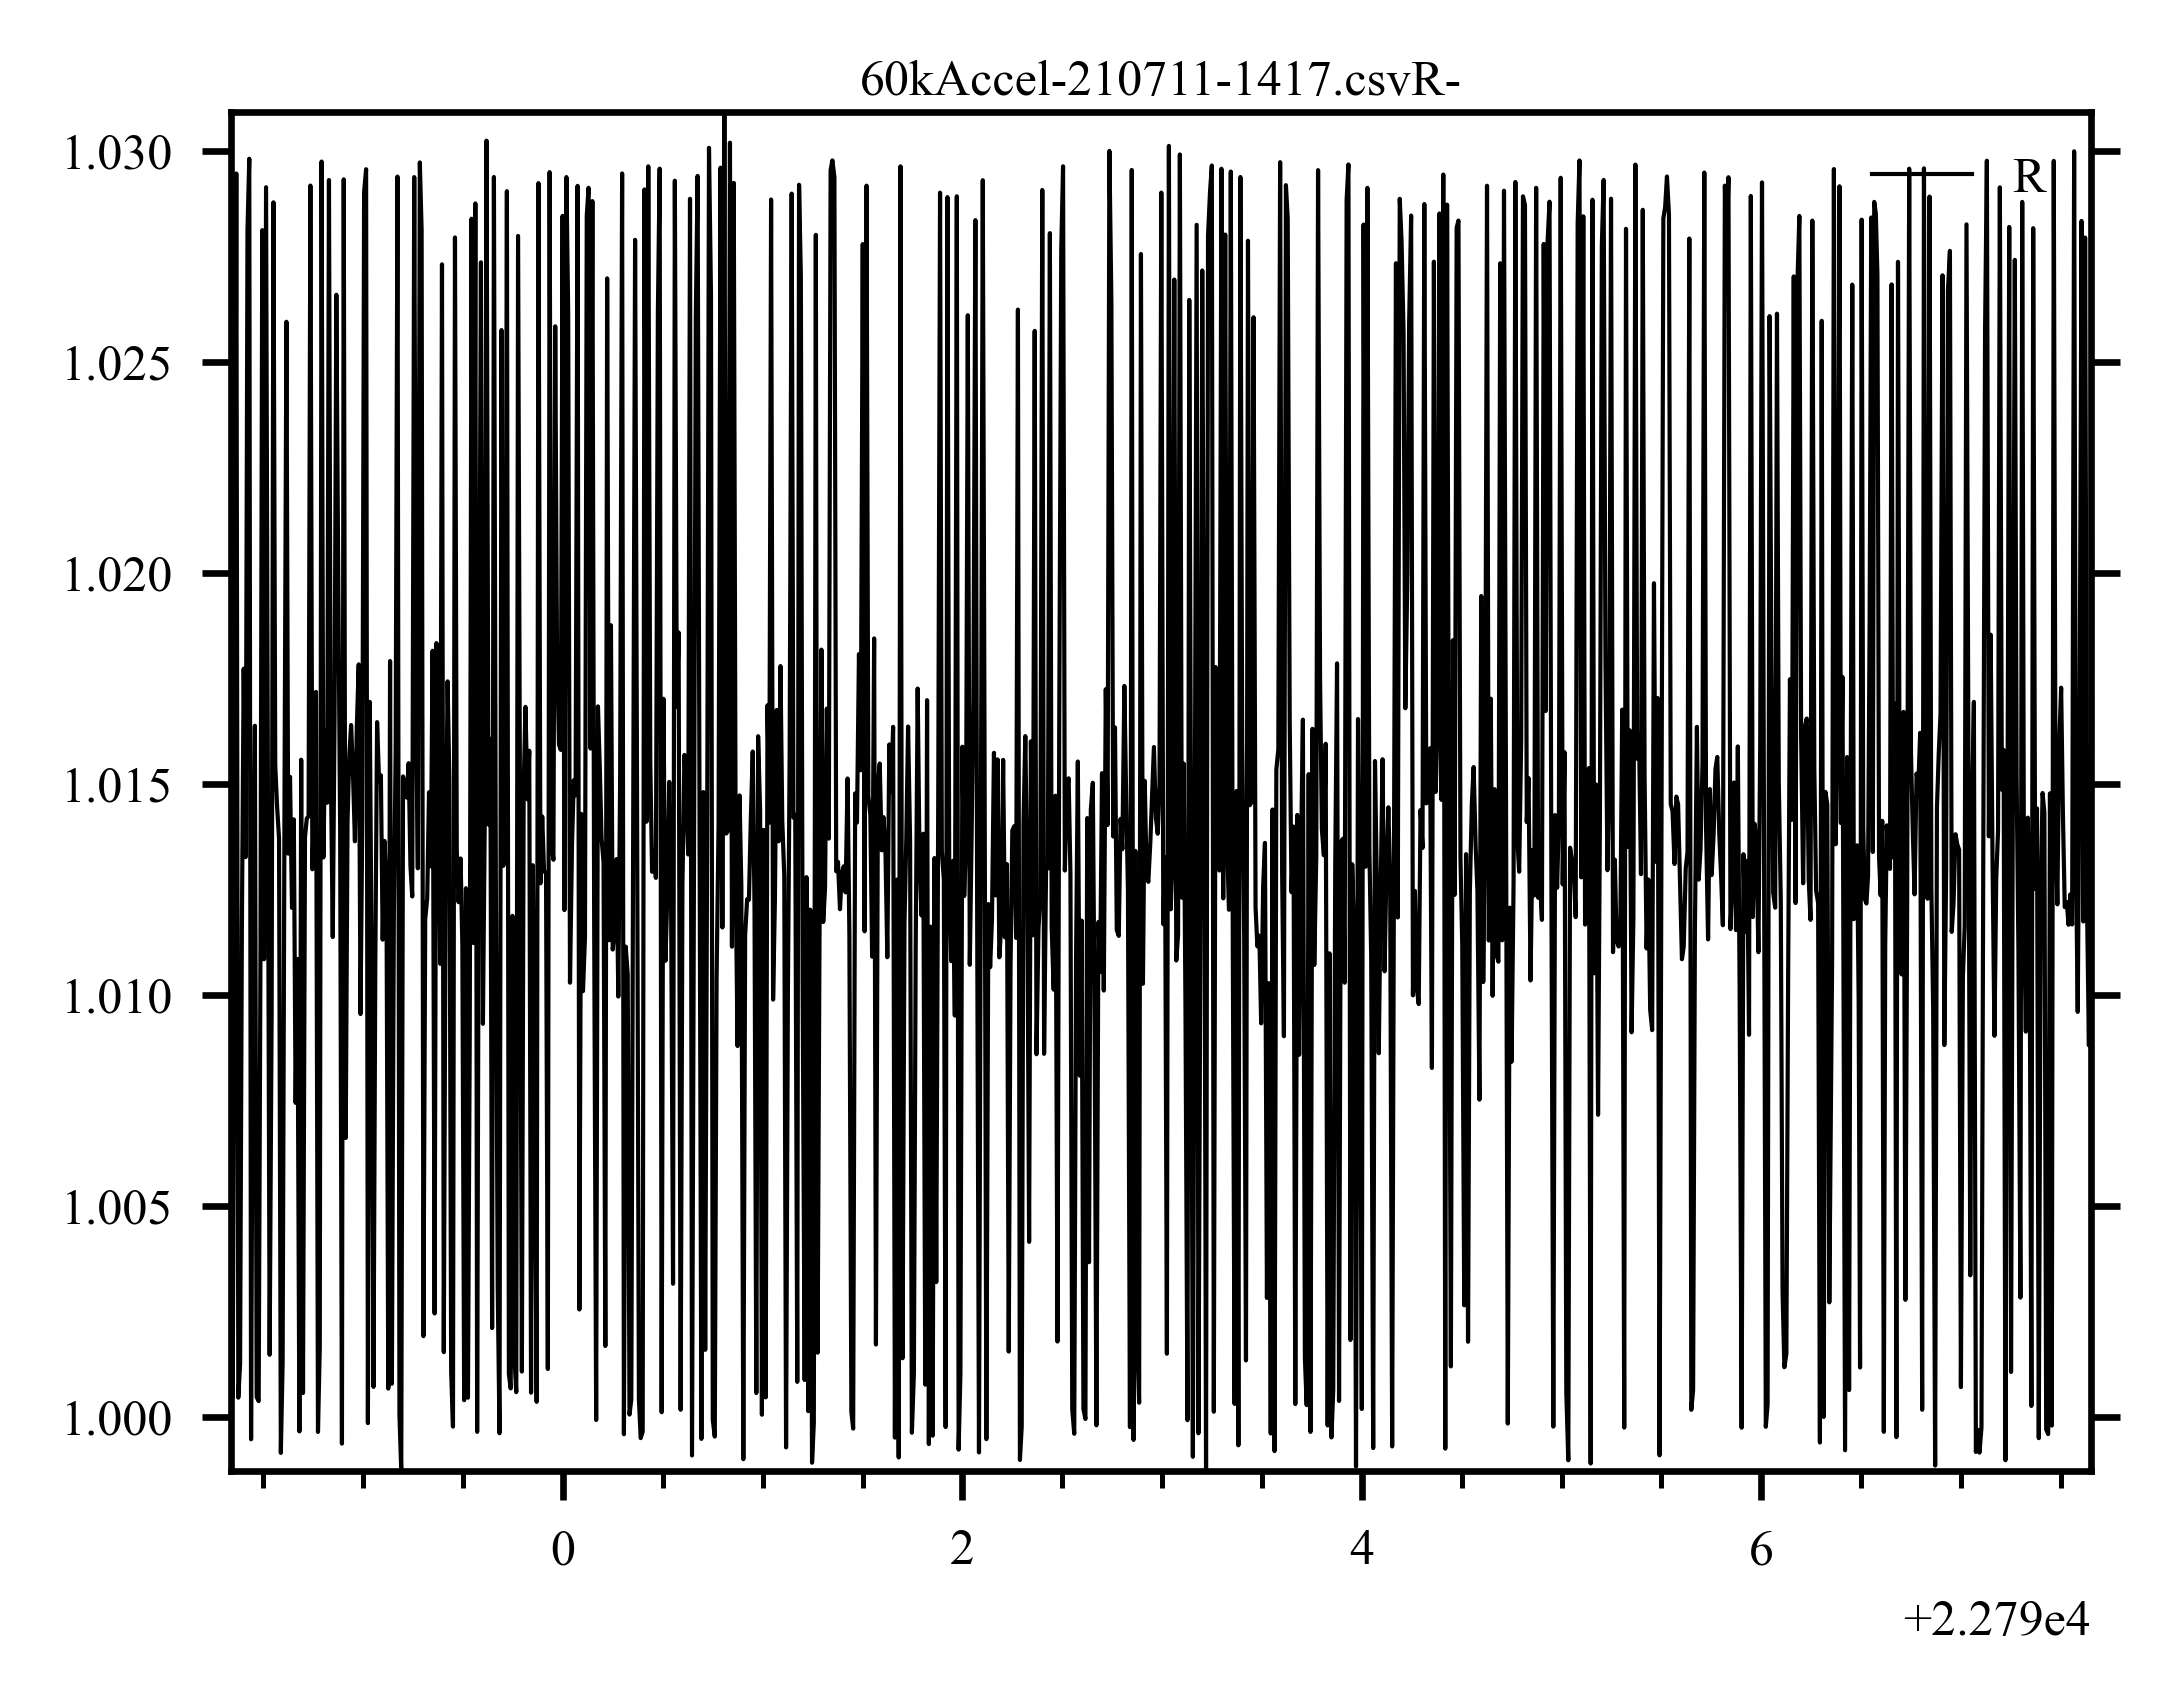

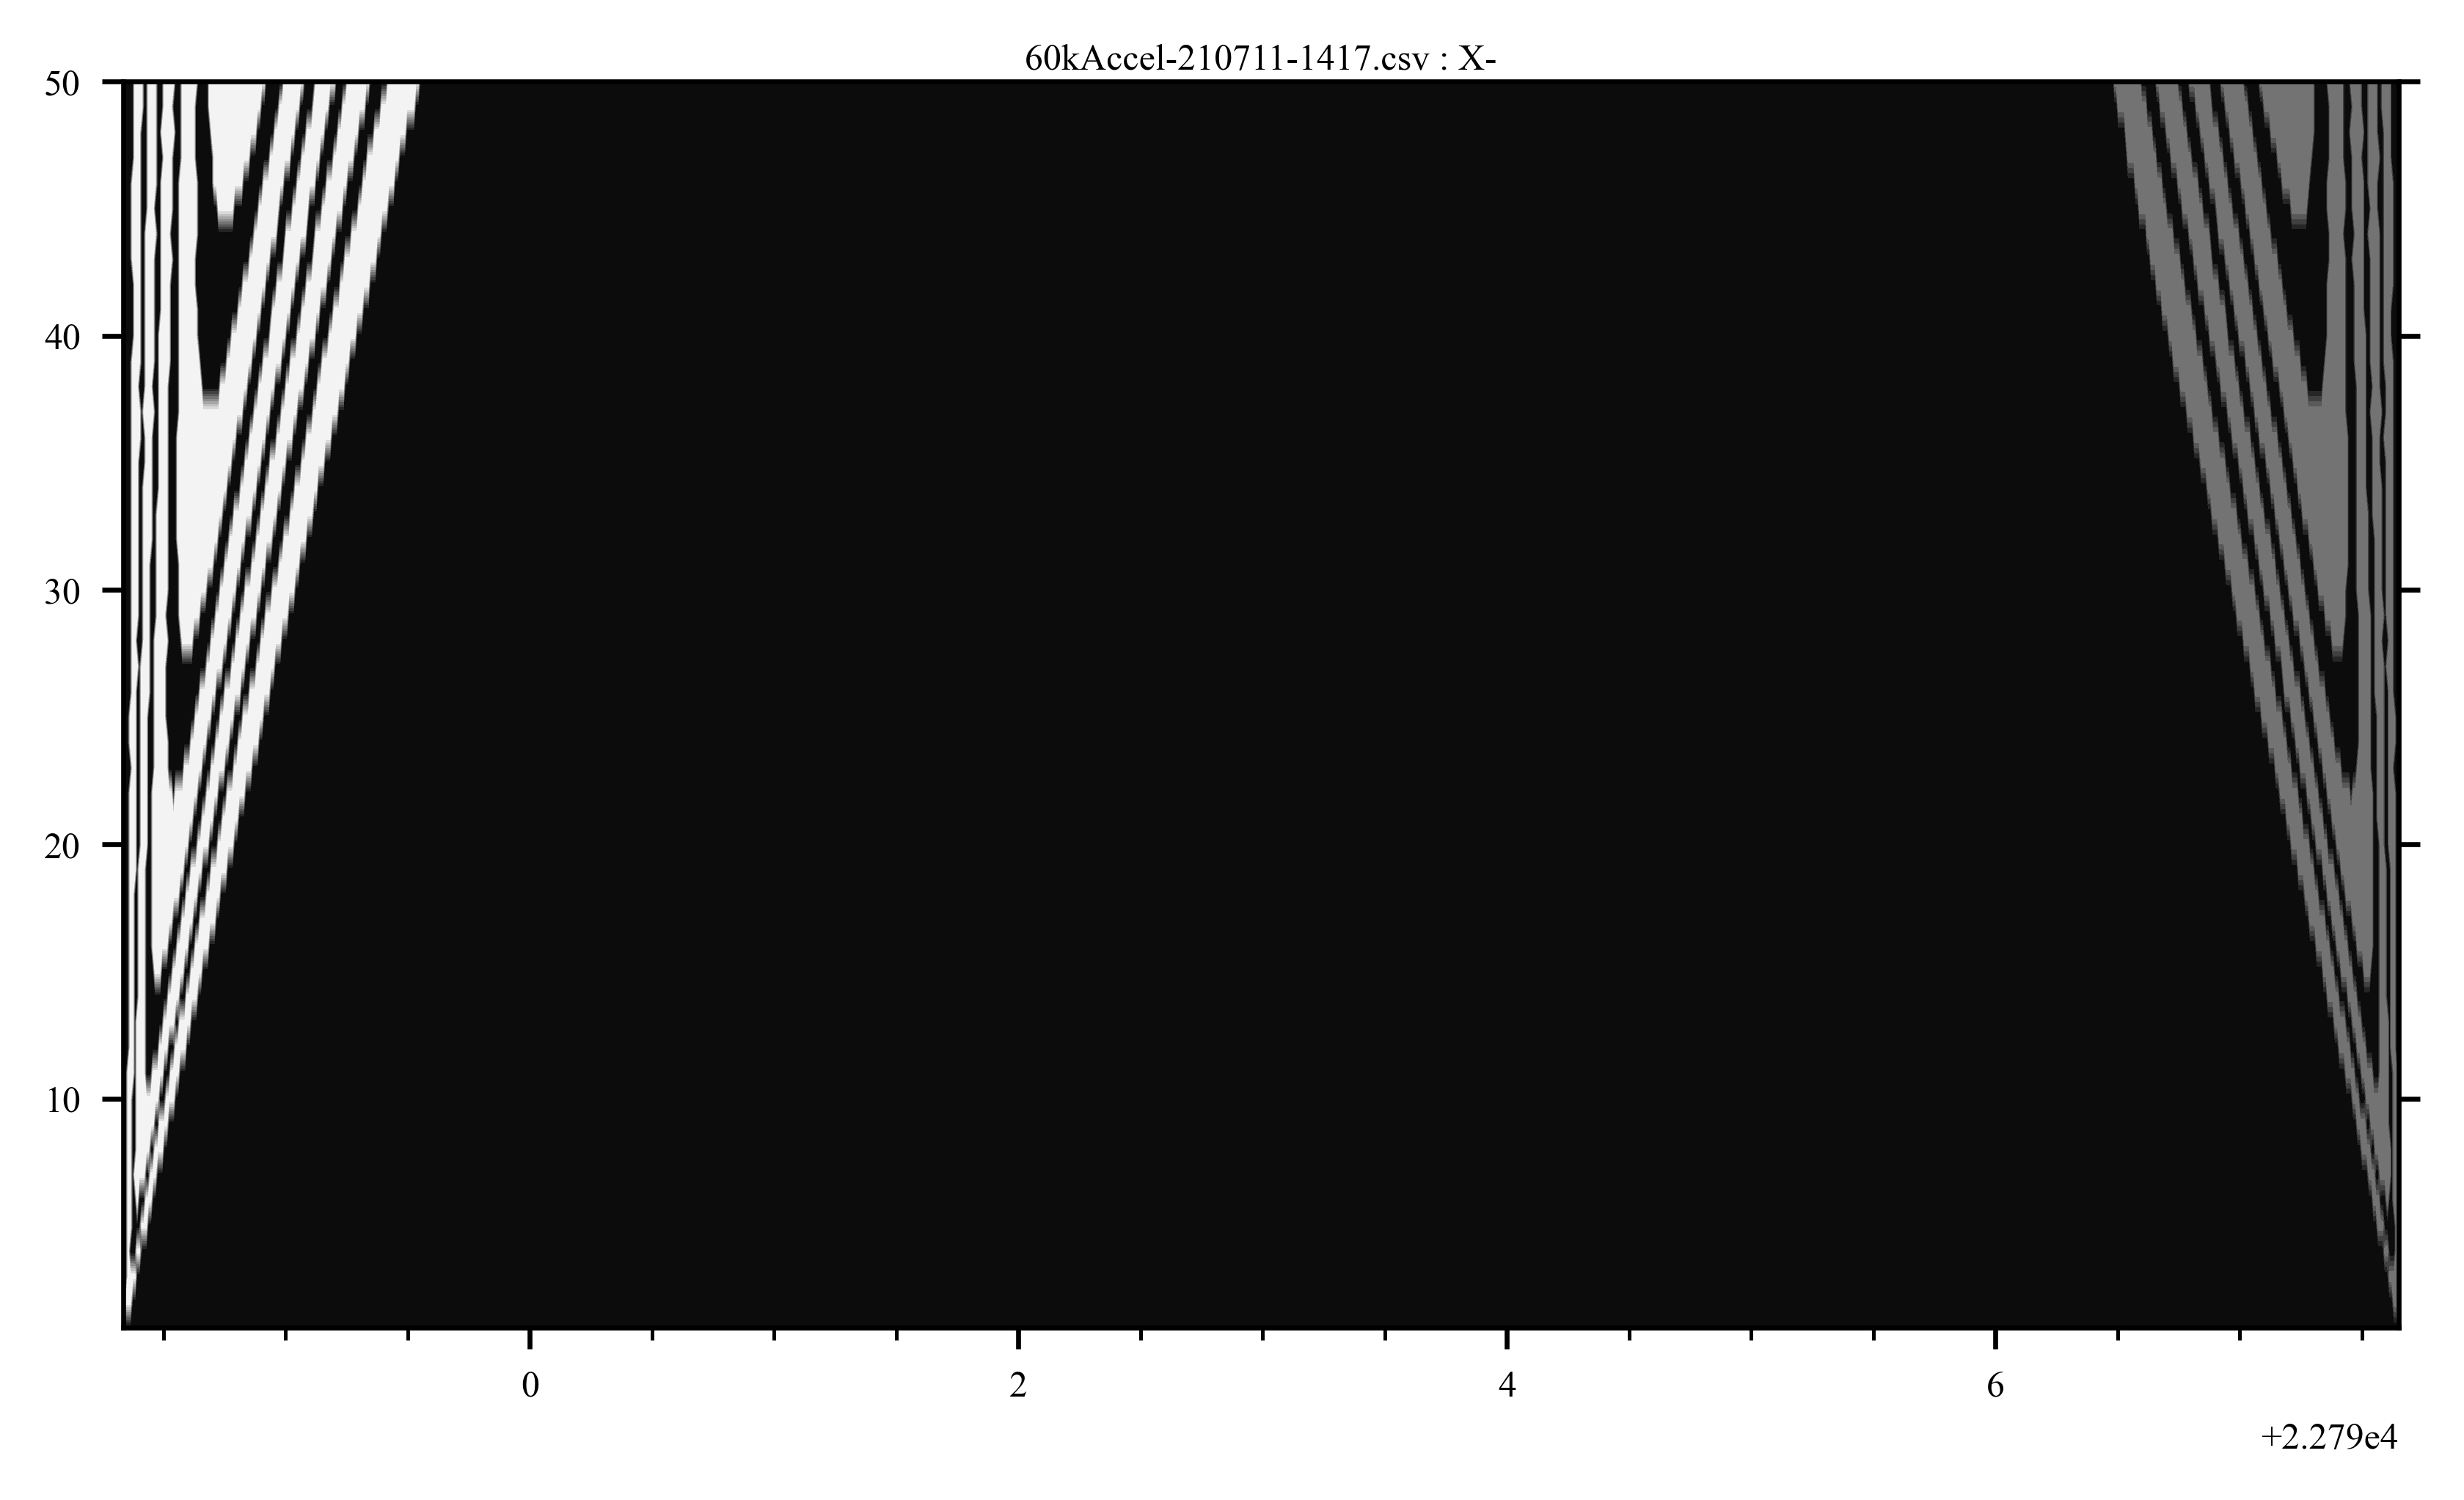

csv


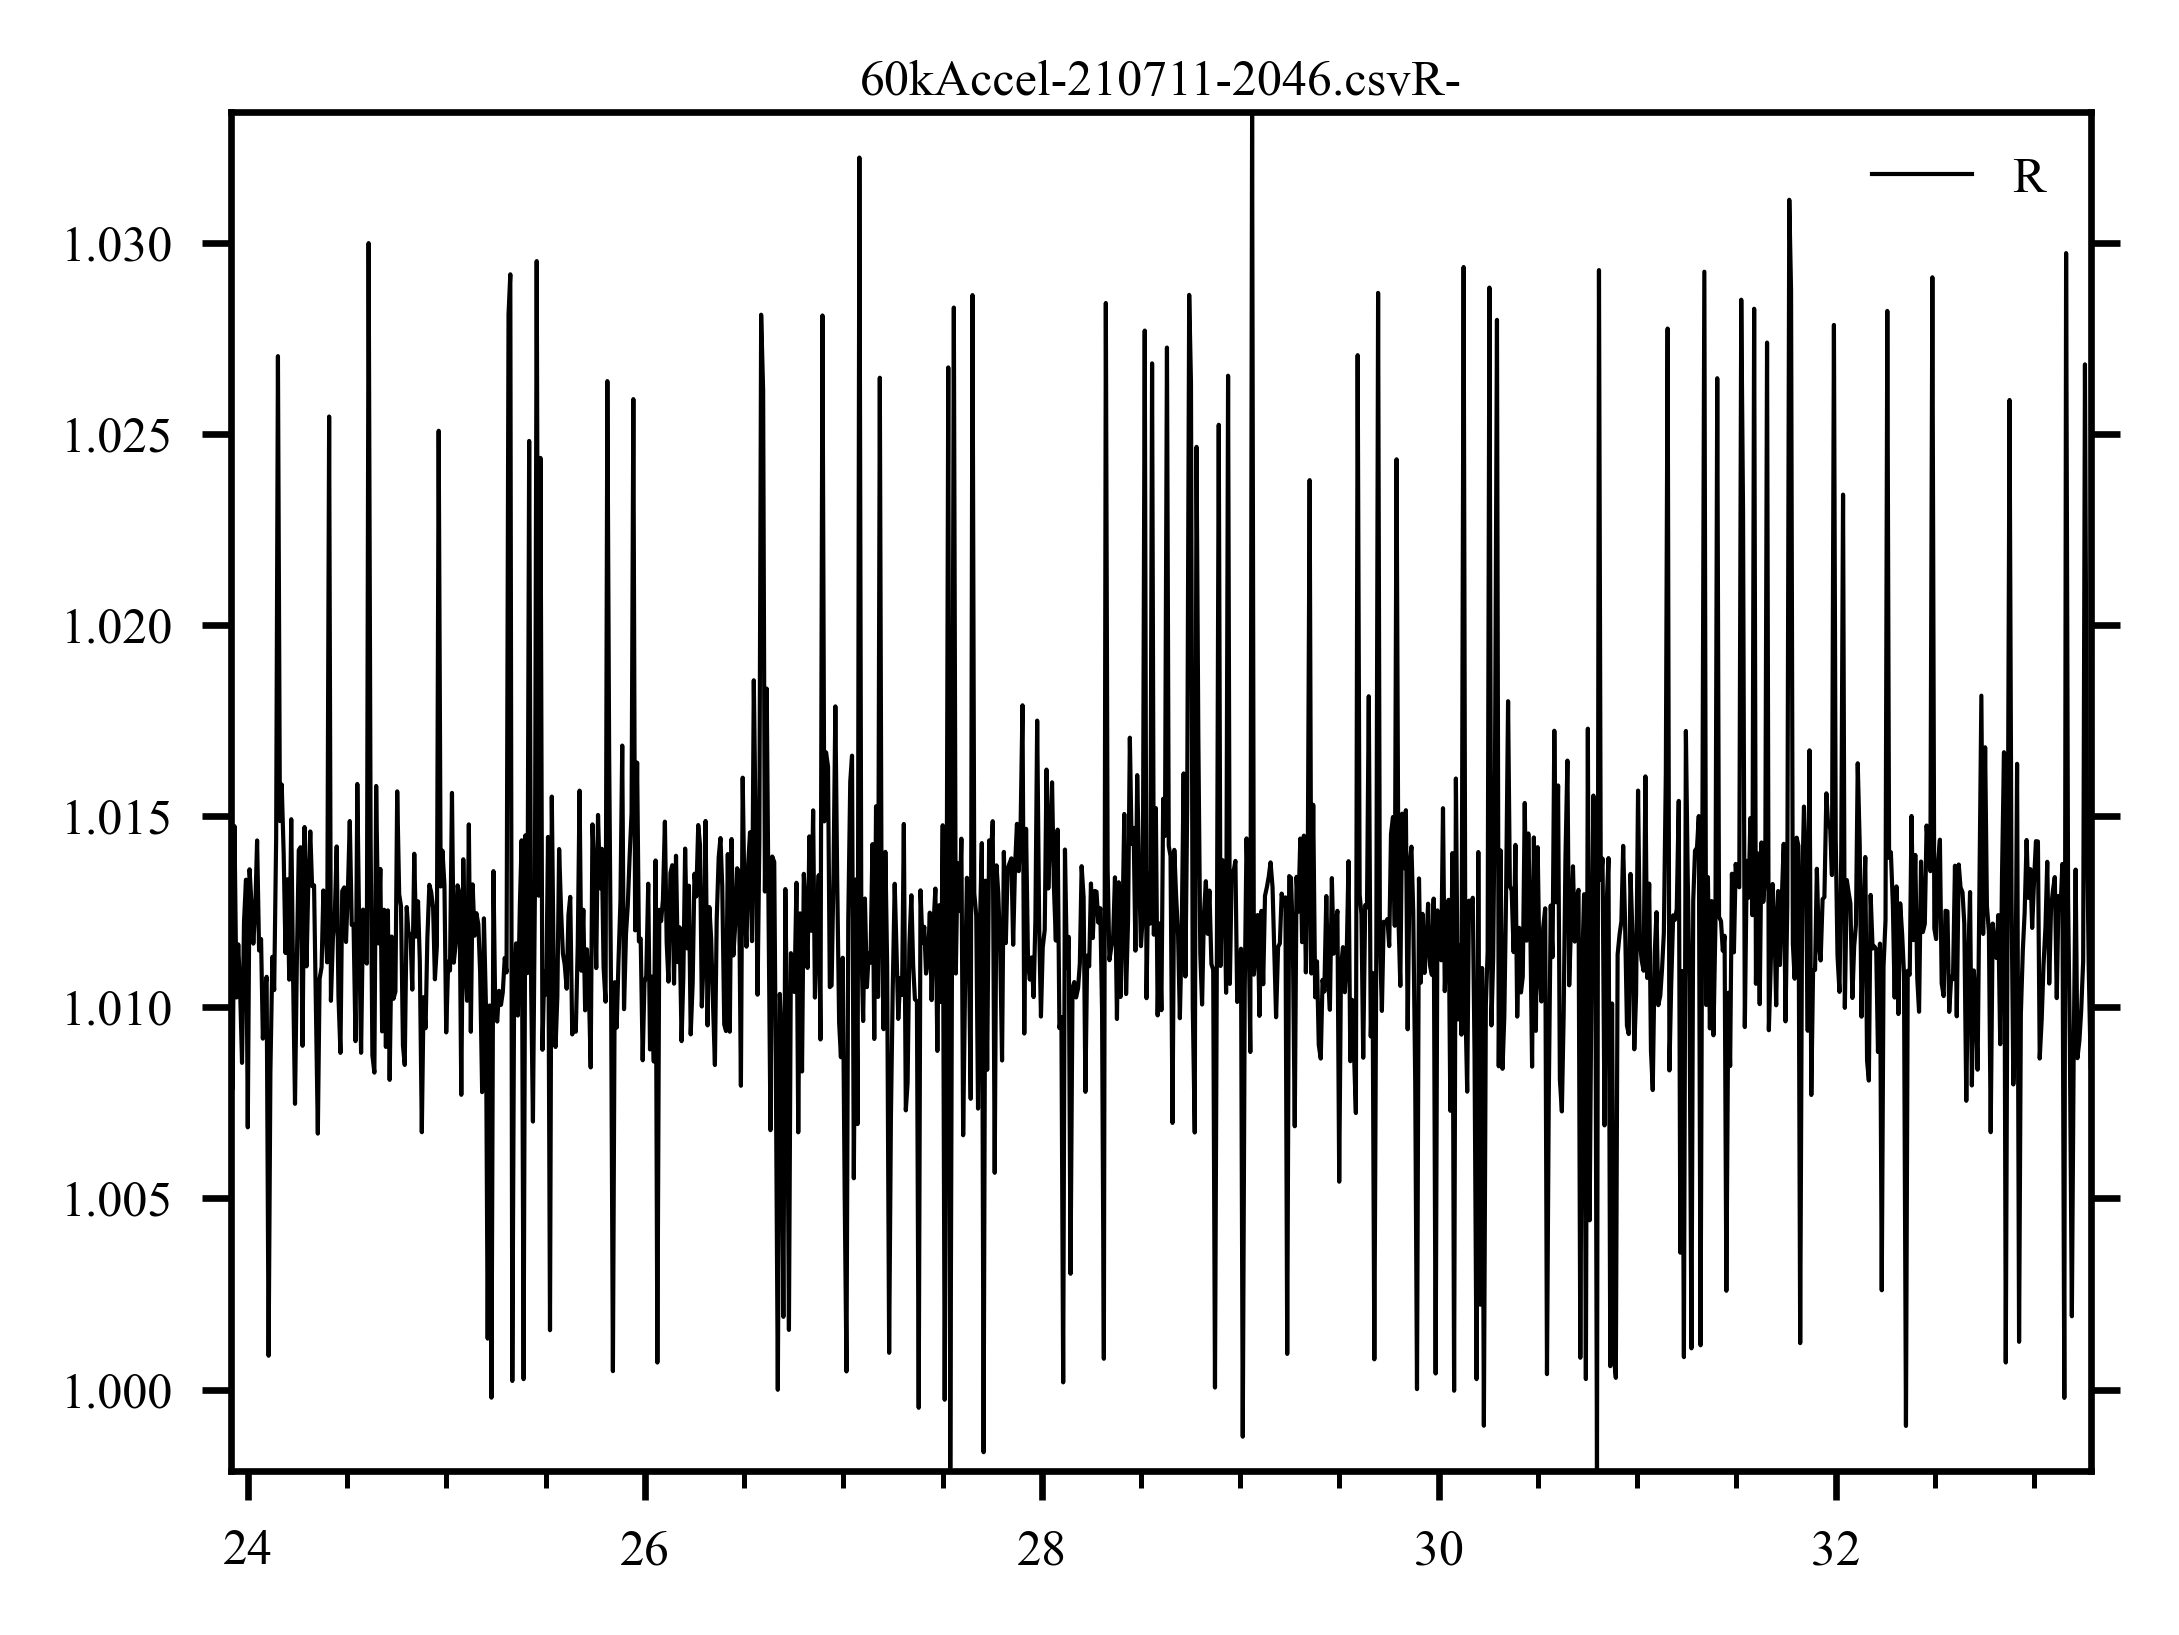

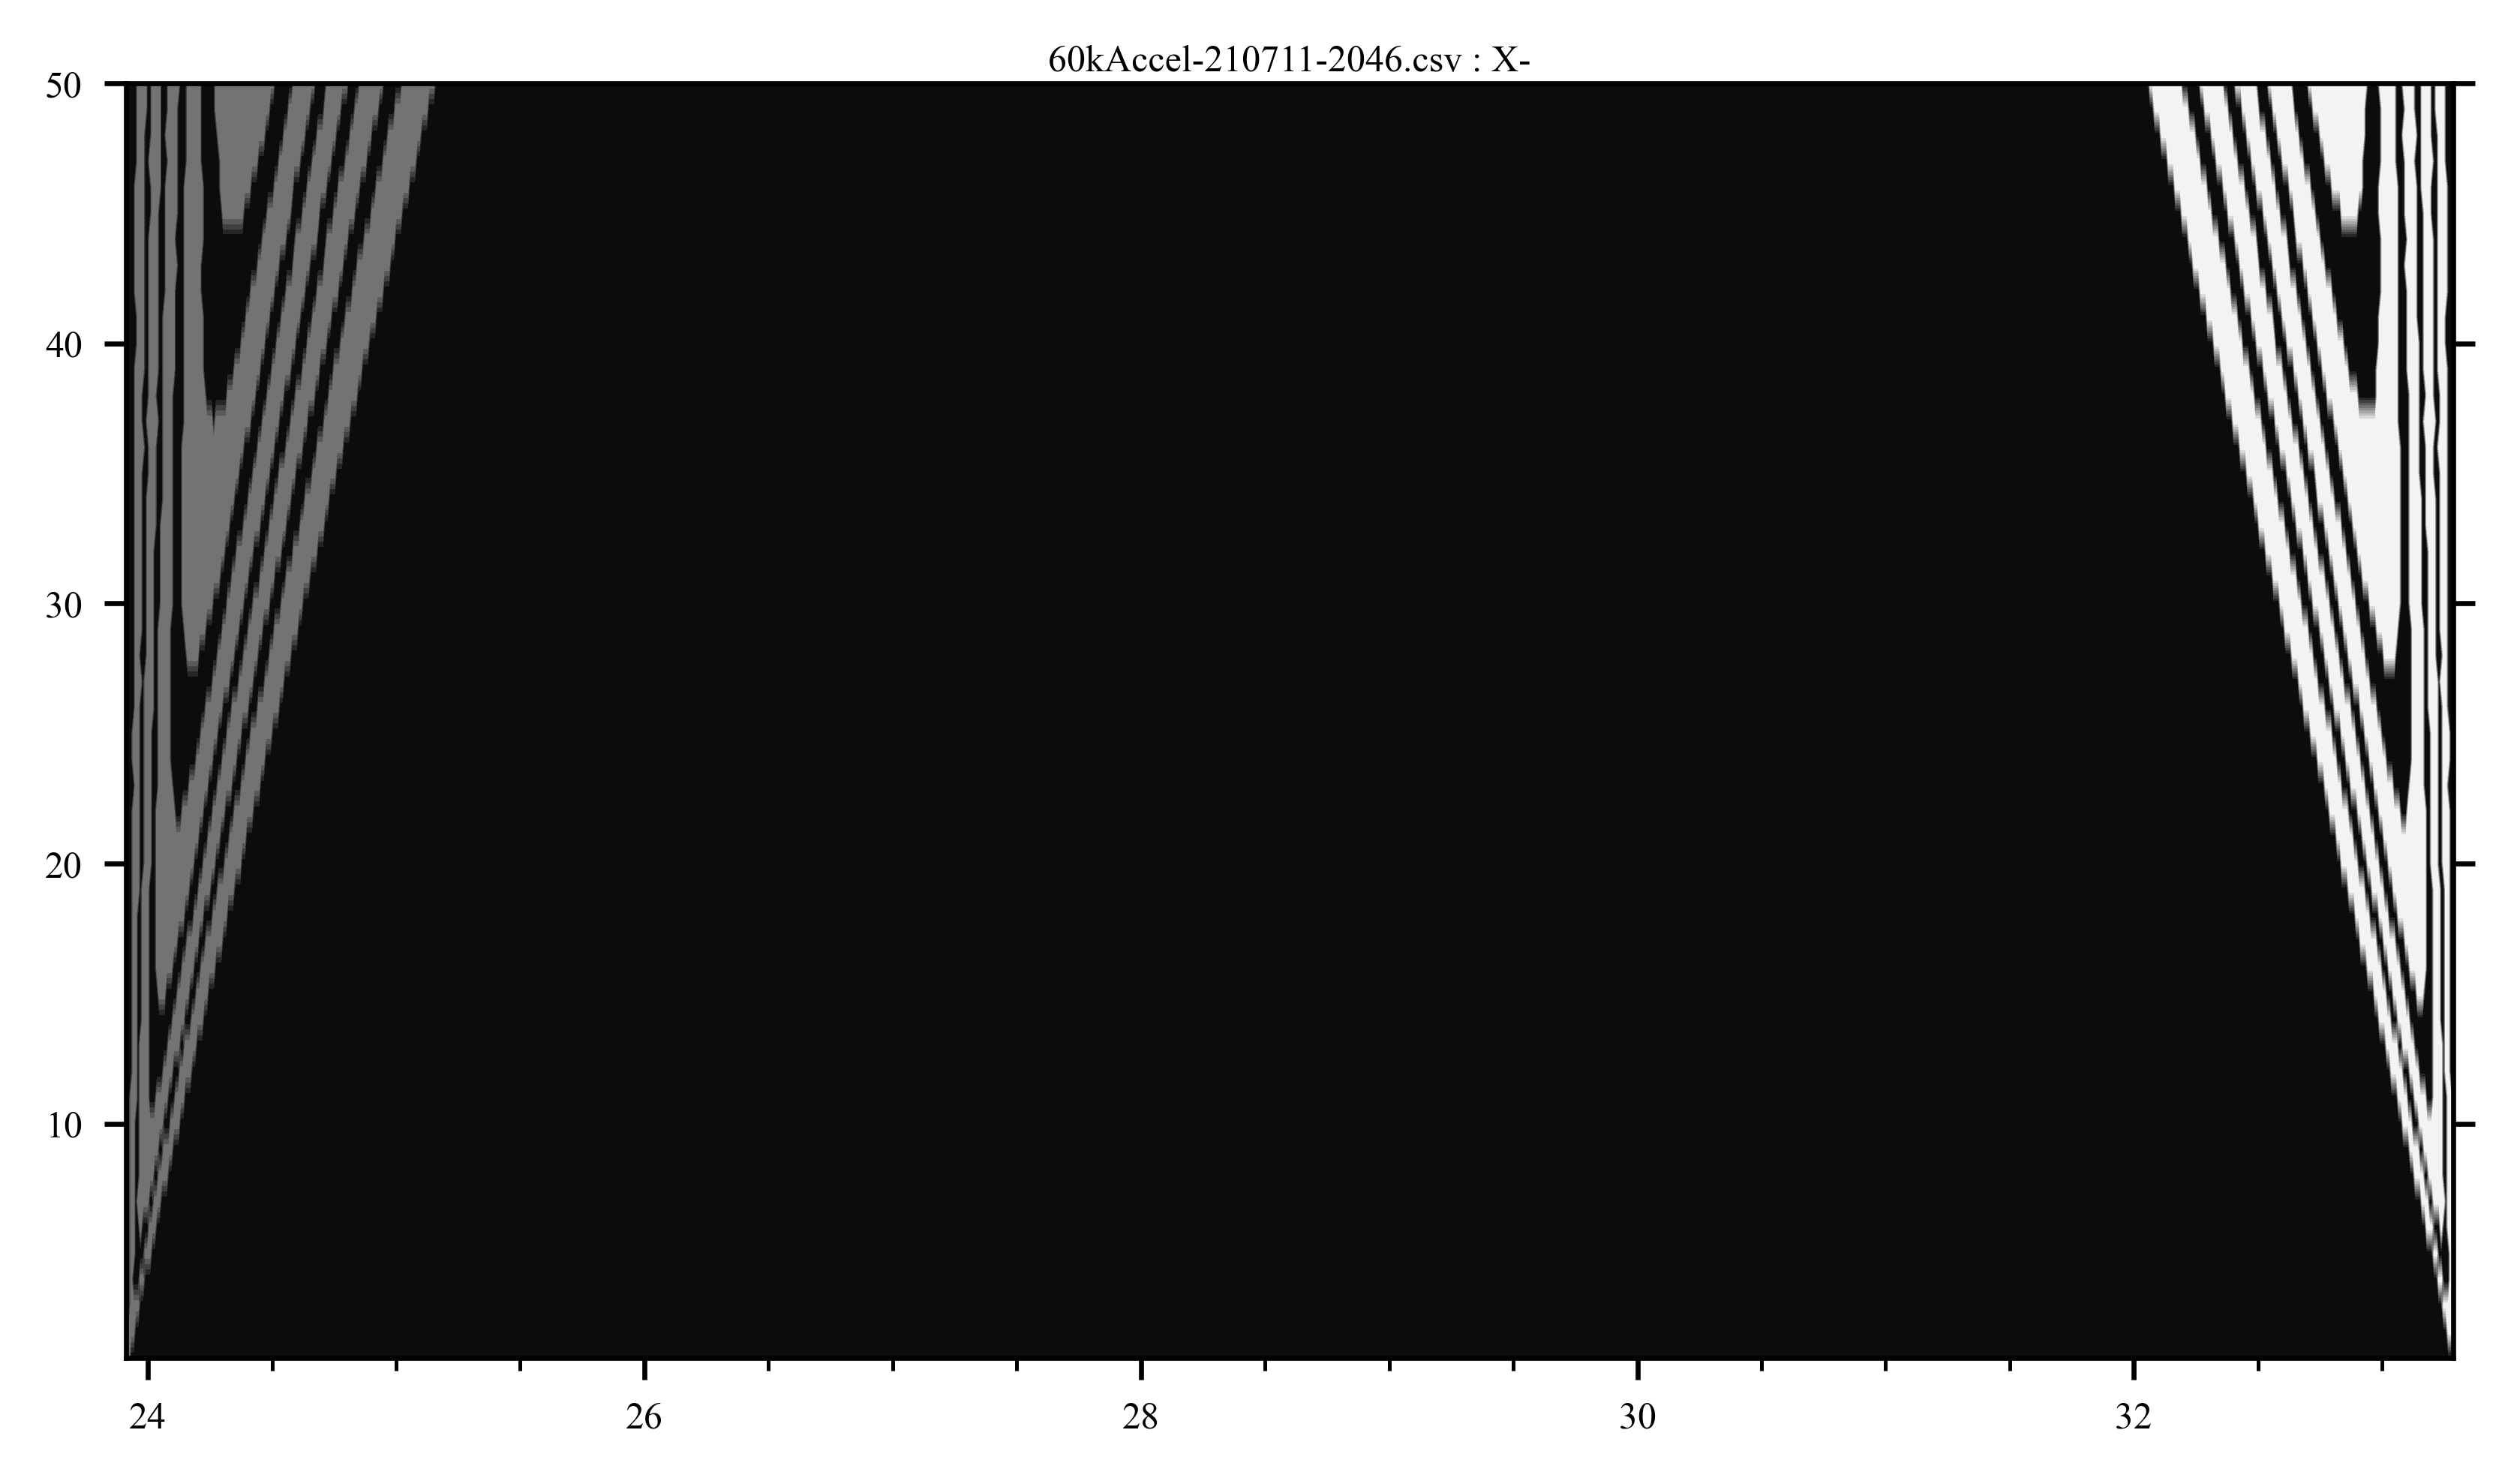

In [37]:
Directory = "E:\\Documents\\Dan\\PhD\\Play\\ASC\\"
files = os.listdir(Directory)
Dots = 1000
Start = 2615

for Filename in files:
    print(Filename[-3:])
    if Filename[-3:] == 'csv':
        Results = []
        DataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=4)
        #plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
        #plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
        for j in range(Dots):
            i = j + Start
            Results.append([DataSet[i,1],np.sqrt(DataSet[i,2]**2+DataSet[i,3]**2+DataSet[i,4]**2)])
        Results = np.matrix(Results)
        plt.plot(Results[:,0],Results[:,1], label = 'R')

        title = Filename + 'R-'
        if Ledgends: plt.legend()
        if Titles: plt.title(title)
        if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        plt.show()
        PlotFingerPrint(np.ravel(Results[:,1]),Results[:,0],Filename+' : X-')